In [1]:
'''
    Convolution  layer -> learns important features from the image
    hidden layers -> adds non linearity to the model
    pooling layer -> reduces the dimensionality
'''

import tensorflow as tf
import matplotlib.pyplot as plt

2025-01-17 12:24:28.610214: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 12:24:28.685689: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 12:24:28.767330: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737096868.852704  416283 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737096868.877770  416283 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 12:24:29.040778: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip



7[Files: 0  Bytes: 0  [0 B/s] Re]87[https://storage.googleapis.com]87Saving 'pizza_steak.zip'
87pizza_steak.zip        0% [>                             ]   46.78K    --.-KB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87[Files: 0  Bytes: 0  [0 B/s] Re]87pizza_steak.zip        0% [>                             ]  703.92K  656.48KB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87pizza_steak.zip        7% [=>                            ]    8.12M    4.03MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87pizza_steak.zip       16% [====>                         ]   17.62M    5.85MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87pizza_steak.zip       26% [======>                       ]   27.43M    6.84MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87pizza_steak.zip       34% [=========>                    ]   36.01M    7.19MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87pizza_steak.zip       42% [===========>                  ]   44.82M    7.46MB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87pizza_steak.zip       50% 

In [3]:
# import zipfile

# zipfile_extract = zipfile.ZipFile("pizza_steak.zip")
# zipfile_extract.extractall()

In [4]:
# zipfile_extract.close()

In [5]:
!ls pizza_steak/test/

pizza  steak


In [15]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories in the path {dirpath} and no of files are: {len(filenames)}:\n")

There are 2 directories in the path pizza_steak and no of files are: 0:

There are 2 directories in the path pizza_steak/train and no of files are: 0:

There are 0 directories in the path pizza_steak/train/steak and no of files are: 750:

There are 0 directories in the path pizza_steak/train/pizza and no of files are: 750:

There are 2 directories in the path pizza_steak/test and no of files are: 0:

There are 0 directories in the path pizza_steak/test/steak and no of files are: 250:

There are 0 directories in the path pizza_steak/test/pizza and no of files are: 250:



In [11]:
!ls -la pizza_steak

total 16
drwxr-xr-x. 4 aklamaash aklamaash 4096 Jan 17 10:49 .
drwxr-xr-x. 4 aklamaash aklamaash 4096 Jan 17 10:49 ..
drwxr-xr-x. 4 aklamaash aklamaash 4096 Jan 17 10:49 test
drwxr-xr-x. 4 aklamaash aklamaash 4096 Jan 17 10:49 train


In [20]:
len(os.listdir("pizza_steak/train//pizza/"))

750

In [21]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/test/")
class_names = [item.name for item in data_dir.glob("*")] # remove .DS_Store if there

['steak', 'pizza']

In [3]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_loc = target_dir + target_class
    random_image = random.sample(os.listdir(target_loc),1)
    img = mpimg.imread(target_loc + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(img.shape)
    plt.show()
    return img 

(342, 512, 3)


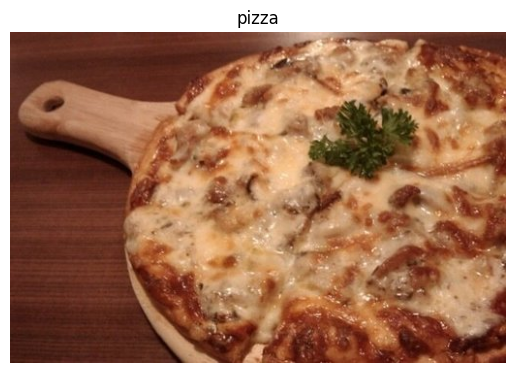

(342, 512, 3)


In [64]:
img_vector = view_random_image("pizza_steak/test/","pizza")
print(tf.constant(img_vector).shape )# width, height and color channels

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D

In [ ]:
'''
    Steps to be followed,
    1) load our images
    2) preprocess it
    3) build model to find pattern in our images
    4) predict and check
'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [69]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [81]:
train_data = train_data_generator.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode ="binary",
    seed=42
)
test_data = test_data_generator.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode ="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [90]:
model_1 = Sequential([
    Conv2D(
        filters=10,
        kernel_size = 3,
        activation='relu',
        input_shape=(224,224,3)
        ),
    Conv2D(
        filters=10,
        kernel_size = 3,
        activation='relu',      
    ),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    Conv2D(
        filters=10,
        kernel_size = 3,
        activation='relu',      
    ),
    # tf.keras.layers.Activation(tf.nn.relu),
    Conv2D(
    filters=10,
    kernel_size = 3,
    activation='relu',      
    ),
    tf.keras.layers.MaxPool2D(
        pool_size=2
    ),
    tf.keras.layers.Flatten(),
    Dense(1,activation="sigmoid")
])

/home/aklamaash/Desktop/Tensforflow/myenv/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model_1.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [95]:
# doing batch gradient
history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data), # train data = no of train images / batch size here 1500 / 32 
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5


2025-01-17 11:52:25.417987: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 63083520 exceeds 10% of free system memory.
2025-01-17 11:52:25.491605: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61952000 exceeds 10% of free system memory.
2025-01-17 11:52:25.600765: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28314720 exceeds 10% of free system memory.
2025-01-17 11:52:25.708434: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29393280 exceeds 10% of free system memory.
2025-01-17 11:52:25.801659: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30976000 exceeds 10% of free system memory.


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.5510 - loss: 0.7827

/home/aklamaash/Desktop/Tensforflow/myenv/lib64/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 780ms/step - accuracy: 0.5523 - loss: 0.7806 - val_accuracy: 0.7620 - val_loss: 0.5215
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 756ms/step - accuracy: 0.7690 - loss: 0.4894 - val_accuracy: 0.8220 - val_loss: 0.4056
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 731ms/step - accuracy: 0.8255 - loss: 0.4115 - val_accuracy: 0.8620 - val_loss: 0.3433
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 764ms/step - accuracy: 0.8308 - loss: 0.4034 - val_accuracy: 0.8140 - val_loss: 0.3910
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 748ms/step - accuracy: 0.8399 - loss: 0.3730 - val_accuracy: 0.8060 - val_loss: 0.4313


In [99]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.8045 - loss: 0.4487


[0.43133455514907837, 0.8059999942779541]

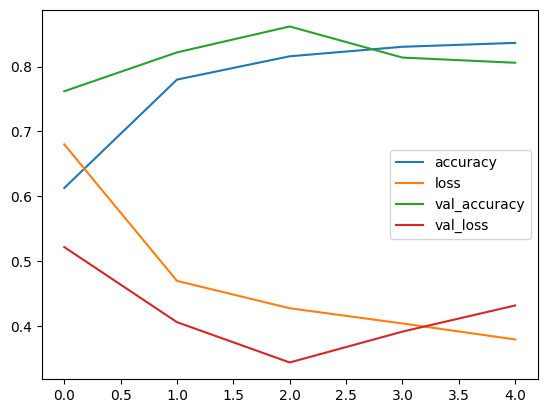

In [105]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.legend()
plt.show()

In [104]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [106]:
model_1.save("cnn_binary_classification_model1.keras")

In [115]:
tf.random.set_seed(42)

model_2_not_cnn = Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),# 3 channels with 224,224 dimension pixels each
    Dense(4,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    Dense(4,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    Dense(1,activation="sigmoid")
])

model_2_not_cnn.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

/home/aklamaash/Desktop/Tensforflow/myenv/lib64/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
history_2 = model_2_not_cnn.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data), # train data = no of train images / batch size here 1500 / 32 
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - accuracy: 0.4898 - loss: 0.9101 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5099 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.5239 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.5047 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.4704 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [117]:
model_2_not_cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [118]:
# despite having 20x more params than our original cnn, we failed to acheive good accuracy

tf.random.set_seed(42)

model_3_not_cnn = Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),# 3 channels with 224,224 dimension pixels each
    Dense(224,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    Dense(100,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    Dense(1,activation="sigmoid")
])

model_3_not_cnn.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

/home/aklamaash/Desktop/Tensforflow/myenv/lib64/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [119]:
history_3 = model_3_not_cnn.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data), # train data = no of train images / batch size here 1500 / 32 
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 463ms/step - accuracy: 0.5627 - loss: 16.5087 - val_accuracy: 0.5420 - val_loss: 3.2849
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 490ms/step - accuracy: 0.6344 - loss: 2.2429 - val_accuracy: 0.7220 - val_loss: 0.5356
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 0.6225 - loss: 0.6994 - val_accuracy: 0.7580 - val_loss: 0.5506
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 487ms/step - accuracy: 0.7171 - loss: 0.5894 - val_accuracy: 0.7400 - val_loss: 0.5513
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 499ms/step - accuracy: 0.6571 - loss: 0.6050 - val_accuracy: 0.7720 - val_loss: 0.5636


In [120]:
model_3_not_cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 224)            │    33,718,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        22,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,223,293 (386.14 MB)

 Trainable params: 33,741,097 (128.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,482,196 (257.42 MB)

: 

In [12]:
import matplotlib.image as mpimg
import random
import os
import matplotlib.pyplot as plt
def view_random_image(target_dir,target_class):
    target_loc = target_dir + target_class
    random_image = random.sample(os.listdir(target_loc),1)
    img = mpimg.imread(target_loc + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(img.shape)
    plt.show()
    return img

(384, 512, 3)


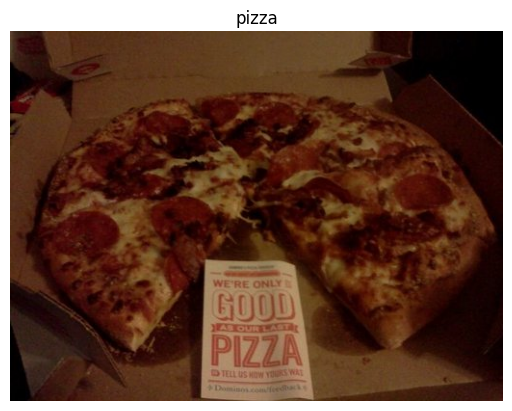

array([[[95, 67, 55],
        [90, 62, 50],
        [81, 55, 42],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[94, 66, 54],
        [89, 61, 49],
        [81, 55, 42],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[96, 68, 54],
        [91, 63, 49],
        [83, 57, 42],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [63, 24, 17],
        [65, 24, 18],
        [65, 24, 18]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [67, 29, 20],
        [69, 28, 22],
        [70, 29, 23]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [67, 29, 20],
        [69, 28, 22],
        [71, 30, 24]]], dtype=uint8)

In [15]:
view_random_image("pizza_steak/test/","pizza")

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
train_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [47]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [48]:
train_data = train_data_generator.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode="binary",
    batch_size=32 # size of minibatches to load the data
)

test_data = test_data_generator.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [53]:
# Import required libraries
import numpy as np

def print_images_from_generator(data_generator, dataset_name):
    print(f"\nPrinting images from {dataset_name}:")
    batch_index = 0
    for images, labels in data_generator:
        print(f"\nBatch {batch_index}:")
        print(f"Images tensor shape: {images.shape}")
        print(f"Labels tensor shape: {labels.shape}")
        print(f"First image tensor:\n{images[0]}") 
        print(f"Corresponding label: {labels[0]}") 

        batch_index += 1
        if batch_index >= len(data_generator):
            break

print_images_from_generator(train_data, "Train Data")
print_images_from_generator(test_data, "Test Data")



Printing images from Train Data:

Batch 0:
Images tensor shape: (32, 224, 224, 3)
Labels tensor shape: (32,)
First image tensor:
[[[0.61960787 0.35686275 0.15294118]
  [0.61960787 0.34117648 0.13725491]
  [0.6117647  0.3254902  0.11764707]
  ...
  [0.6        0.30588236 0.23137257]
  [0.58431375 0.2901961  0.21568629]
  [0.5803922  0.28627452 0.21176472]]

 [[0.6        0.31764707 0.12941177]
  [0.5882353  0.29803923 0.10588236]
  [0.5803922  0.27450982 0.08235294]
  ...
  [0.5803922  0.28627452 0.21176472]
  [0.5764706  0.28235295 0.20784315]
  [0.5803922  0.28627452 0.21176472]]

 [[0.58431375 0.28235295 0.10196079]
  [0.56078434 0.25490198 0.07450981]
  [0.5411765  0.22352943 0.04705883]
  ...
  [0.5686275  0.27450982 0.20000002]
  [0.5764706  0.28235295 0.20784315]
  [0.5803922  0.28627452 0.21176472]]

 ...

 [[0.8470589  0.78823537 0.7686275 ]
  [0.85098046 0.79215693 0.76470596]
  [0.854902   0.7960785  0.7686275 ]
  ...
  [0.5058824  0.1254902  0.        ]
  [0.5019608  0.1137

In [63]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.models import Sequential

model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size = 3, # filer size
        padding="valid",
        strides=1,
        activation='relu',
        input_shape=(224,224,3)
        ),
    Conv2D(
        filters=10,
        kernel_size = 3,
        activation='relu',      
    ),
    MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    Conv2D(
        filters=10,
        kernel_size = 3,
        activation='relu',      
    ),
    Conv2D(
    filters=10,
    kernel_size = 3,
    activation='relu',      
    ),
    MaxPool2D(
        pool_size=2
    ),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [71]:
'''
when validation loss increases, our model is overfitting
    how to create a model,
    0. create a baseline
    1. overfit the baseline
    2. reduce overfitting
'''
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [72]:
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data), # train data = no of train images / batch size here 1500 / 32 
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.8191 - loss: 0.4119 - val_accuracy: 0.8640 - val_loss: 0.3412
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8394 - loss: 0.3647 - val_accuracy: 0.8380 - val_loss: 0.3558
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 936ms/step - accuracy: 0.8432 - loss: 0.3356 - val_accuracy: 0.8700 - val_loss: 0.3033
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 937ms/step - accuracy: 0.8954 - loss: 0.2626 - val_accuracy: 0.8120 - val_loss: 0.3891
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 752ms/step - accuracy: 0.8984 - loss: 0.2566 - val_accuracy: 0.8600 - val_loss: 0.3335


In [79]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.8595 - loss: 0.3448


[0.33353450894355774, 0.8600000143051147]

In [80]:
model_4.save("../models/model_4_cnn.keras")

In [78]:
train_data_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
)

**Data augmentation is a technique that is used for the process of altering our training data, leading it to have more diversity and making our model more generalized, data augmentation is done only for the training data**

In [107]:
train_data_augmented_vectors = train_data_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode="binary",
    batch_size=32 ,
    shuffle=True
)

Found 1500 images belonging to 2 classes.


In [108]:
images,labels = next(train_data_augmented_vectors)

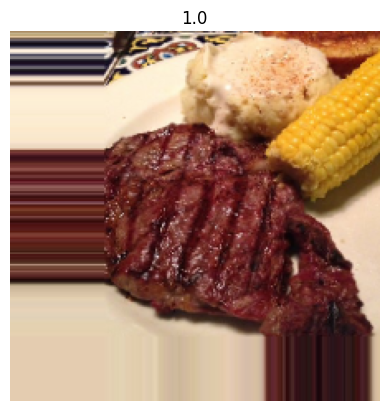

In [109]:
plt.imshow(images[0])
plt.title(labels[0])
plt.axis("off")
plt.show()

In [110]:
model_5 = model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size = 3, # filer size
        padding="valid",
        strides=1,
        activation='relu',
        input_shape=(224,224,3)
        ),
    Conv2D(
        filters=10,
        kernel_size = 3,
        activation='relu',      
    ),
    MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    Conv2D(
        filters=10,
        kernel_size = 3,
        activation='relu',      
    ),
    Conv2D(
    filters=10,
    kernel_size = 3,
    activation='relu',      
    ),
    MaxPool2D(
        pool_size=2
    ),
    Flatten(),
    Dense(1,activation="sigmoid")
])

/home/aklamaash/Desktop/Tensforflow/myenv/lib64/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [112]:
history_5 = model_5.fit(
    train_data_augmented_vectors,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_vectors), # train data = no of train images / batch size here 1500 / 32 
    validation_data = test_data,
    validation_steps = len(train_data_augmented_vectors)
)

/home/aklamaash/Desktop/Tensforflow/myenv/lib64/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 749ms/step - accuracy: 0.5493 - loss: 0.7073 - val_accuracy: 0.7540 - val_loss: 0.5405
Epoch 2/5


/home/aklamaash/Desktop/Tensforflow/myenv/lib64/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 737ms/step - accuracy: 0.7061 - loss: 0.5886 - val_accuracy: 0.8000 - val_loss: 0.4737
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 783ms/step - accuracy: 0.7267 - loss: 0.5479 - val_accuracy: 0.8500 - val_loss: 0.3739
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 788ms/step - accuracy: 0.7501 - loss: 0.5191 - val_accuracy: 0.8320 - val_loss: 0.3695
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 768ms/step - accuracy: 0.7636 - loss: 0.5097 - val_accuracy: 0.8380 - val_loss: 0.3613


<Axes: >

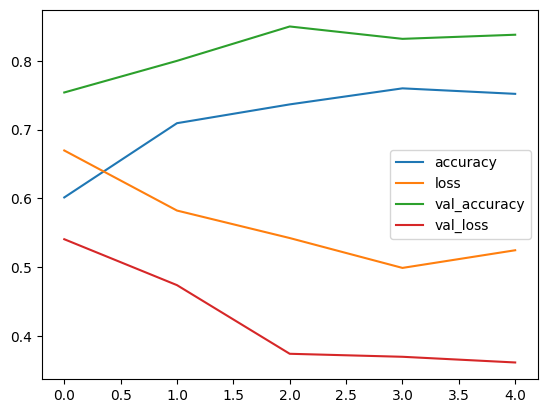

In [113]:
import pandas as pd

pd.DataFrame(history_5.history).plot()

In [118]:
class_names = os.listdir("pizza_steak/test/")

In [37]:
import tensorflow as tf

model = tf.keras.models.load_model("../models/model_5_with_cnn.h5")

### Testing on custom data

Image shape: (4032, 3024, 3)


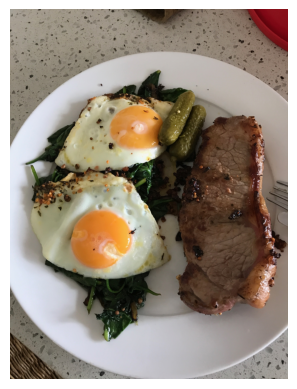

In [13]:
import matplotlib.image as mpimg
import urllib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"

with urllib.request.urlopen(url) as response:
    img = Image.open(response)

img_vector = np.array(img)
plt.imshow(img_vector)
plt.axis("off")
print("Image shape:", img_vector.shape)


In [57]:
from PIL import Image
import urllib
import numpy as np

def preprocess_custom_image(path: str = "", isurl: bool = False, target_shape=(224, 224)):
    if path == "":
        raise AttributeError("Specify path")
    
    if isurl and path.startswith("http"):
        with urllib.request.urlopen(path) as response:
            img = Image.open(response)
    else:
        img = Image.open(path)
    
    img = img.convert("RGB")
    
    img = img.resize(target_shape, Image.Resampling.LANCZOS)
    
    img_array = np.array(img, dtype=np.float32) / 255.0
    
    img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 224, 224, 3)
    
    return img_array


In [ ]:
import os
import random

def return_random_image_from_data(folder="pizza_steak/test/"):
    """
    Randomly selects and returns the path to a .jpg or .jpeg file
    from the specified folder and its subdirectories.

    Args:
        folder (str): Path to the root folder containing images.
    
    Returns:
        str: Path to a randomly selected .jpg or .jpeg file.
    """
    
    jpg_files = []
    for root, _, files in os.walk(folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg')):
                jpg_files.append(os.path.join(root, file))
    
    if not jpg_files:
        raise FileNotFoundError("No .jpg or .jpeg files found in the specified folder.")
    
    return random.choice(jpg_files)


In [107]:
def predict_classification(path:str):
    try:
        img_vector_normalized = preprocess_custom_image(return_random_image_from_data(),True)
        if model.predict(img_vector_normalized) <= 0.5:
            print("It's a pizza")
        else:
            print("It's a steak")
        plt.figure(figsize=(10,7))
        plt.imshow(img_vector_normalized[0])
        plt.axis("off")
        plt.show()
    except FileNotFoundError:
        print("Give proper file path")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
It's a steak


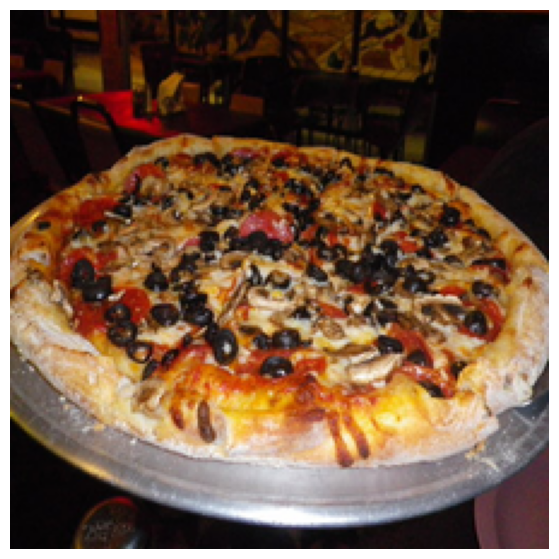

In [ ]:
predict_classification("") 